In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = torch.linspace(1, 50, 50).reshape(-1,1)

In [3]:
print(x)

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])


In [4]:
torch.manual_seed(71)
e = torch.randint(-8,9,(50, 1), dtype=torch.float32)
print(e)

tensor([[ 2.],
        [ 7.],
        [ 2.],
        [ 6.],
        [ 2.],
        [-4.],
        [ 2.],
        [-5.],
        [ 4.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 1.],
        [-8.],
        [ 5.],
        [ 5.],
        [-6.],
        [ 0.],
        [-7.],
        [-8.],
        [-3.],
        [-1.],
        [ 2.],
        [-6.],
        [-3.],
        [ 3.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 1.],
        [ 7.],
        [ 6.],
        [-1.],
        [-6.],
        [-5.],
        [-3.],
        [ 7.],
        [ 0.],
        [ 8.],
        [-1.],
        [-2.],
        [ 2.],
        [-8.],
        [-1.],
        [ 6.],
        [-8.],
        [-3.],
        [-7.],
        [-2.]])


In [5]:
y = 2*x+1+e

In [6]:
print(y.shape)

torch.Size([50, 1])


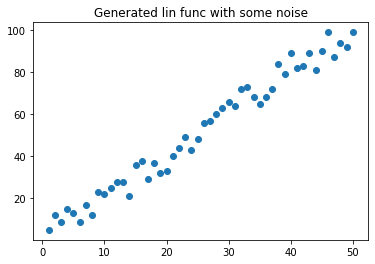

In [7]:
plt.title("Generated lin func with some noise")
plt.scatter(x.numpy(), y.numpy())

In [8]:
torch.manual_seed(59)

model = nn.Linear(in_features=1, out_features=1)

print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [9]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [10]:
torch.manual_seed(59)

model = Model(1,1)

print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [11]:
for name,param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [12]:
X = torch.tensor([2.0])
print(model.forward(X))

tensor([1.1758], grad_fn=<AddBackward0>)


In [13]:
x1 = np.linspace(0.0, 50.0, 50)
x1

array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
        5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
       10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
       15.30612245, 16.32653061, 17.34693878, 18.36734694, 19.3877551 ,
       20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])

In [14]:
w1 = 0.1059
b1 = 0.9637

y1 = w1*x1 + b1

In [15]:
y1

array([0.9637    , 1.07176122, 1.17982245, 1.28788367, 1.3959449 ,
       1.50400612, 1.61206735, 1.72012857, 1.8281898 , 1.93625102,
       2.04431224, 2.15237347, 2.26043469, 2.36849592, 2.47655714,
       2.58461837, 2.69267959, 2.80074082, 2.90880204, 3.01686327,
       3.12492449, 3.23298571, 3.34104694, 3.44910816, 3.55716939,
       3.66523061, 3.77329184, 3.88135306, 3.98941429, 4.09747551,
       4.20553673, 4.31359796, 4.42165918, 4.52972041, 4.63778163,
       4.74584286, 4.85390408, 4.96196531, 5.07002653, 5.17808776,
       5.28614898, 5.3942102 , 5.50227143, 5.61033265, 5.71839388,
       5.8264551 , 5.93451633, 6.04257755, 6.15063878, 6.2587    ])

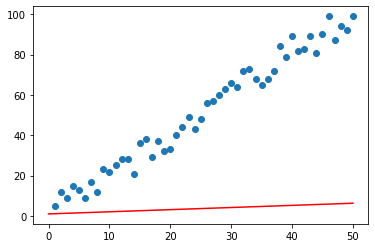

In [16]:
plt.scatter(x.numpy(), y.numpy())
plt.plot(x1,y1, 'r')

In [17]:
criterion = nn.MSELoss()

In [18]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)

In [19]:
EPOCHS = 50
losses = []

for epoch in range(EPOCHS):
    epoch +=1
    
    #prediction forward pass
    y_pred = model.forward(x)
    
    #calculate error
    loss = criterion(y_pred,y)
    
    losses.append(loss)
    
    print(f"Epoch {epoch} loss {loss.item()} weight {model.linear.weight.item()} bias {model.linear.bias.item()}")
    
    optimizer.zero_grad()
    
    loss.backward()
    optimizer.step()

Epoch 1 loss 3057.216796875 weight 0.10597813129425049 bias 0.9637961387634277
Epoch 2 loss 1588.5306396484375 weight 3.334900140762329 bias 1.0604636669158936
Epoch 3 loss 3244.615234375 weight 3.9208626747131348 bias 1.0792635679244995
Epoch 4 loss 662.5842895507812 weight 1.1211044788360596 bias 0.9980610013008118
Epoch 5 loss 3123.031982421875 weight 0.08552447706460953 bias 0.9698061943054199
Epoch 6 loss 182.04483032226562 weight 2.4172370433807373 bias 1.042075514793396
Epoch 7 loss 2769.7919921875 weight 3.7722764015197754 bias 1.085754632949829
Epoch 8 loss 24.695791244506836 weight 1.9194797277450562 bias 1.034508228302002
Epoch 9 loss 2280.2529296875 weight 0.36349600553512573 bias 0.9924240112304688
Epoch 10 loss 68.85305786132812 weight 1.7484142780303955 bias 1.0380250215530396
Epoch 11 loss 1745.2393798828125 weight 3.399914026260376 bias 1.0918208360671997
Epoch 12 loss 210.32440185546875 weight 2.4529685974121094 bias 1.0686577558517456
Epoch 13 loss 1237.260009765625 

Text(0.5, 0, 'Epochs')

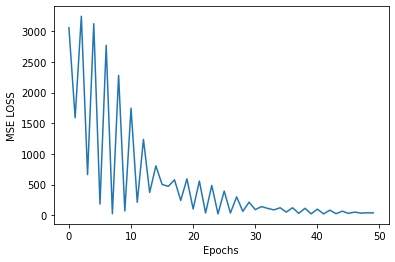

In [21]:
plt.plot(range(EPOCHS), losses)
plt.ylabel('MSE LOSS')
plt.xlabel('Epochs')

In [22]:
s = np.linspace(0.0, 50.0, 50)
current_weight = model.linear.weight.item()
current_bias = model.linear.bias.item()

predicted_y = current_weight*s + current_bias

In [23]:
predicted_y

array([ 1.29669356,  3.20665483,  5.11661609,  7.02657735,  8.93653861,
       10.84649988, 12.75646114, 14.6664224 , 16.57638366, 18.48634493,
       20.39630619, 22.30626745, 24.21622871, 26.12618998, 28.03615124,
       29.9461125 , 31.85607376, 33.76603503, 35.67599629, 37.58595755,
       39.49591881, 41.40588008, 43.31584134, 45.2258026 , 47.13576386,
       49.04572513, 50.95568639, 52.86564765, 54.77560891, 56.68557018,
       58.59553144, 60.5054927 , 62.41545396, 64.32541523, 66.23537649,
       68.14533775, 70.05529901, 71.96526028, 73.87522154, 75.7851828 ,
       77.69514406, 79.60510533, 81.51506659, 83.42502785, 85.33498911,
       87.24495038, 89.15491164, 91.0648729 , 92.97483416, 94.88479543])

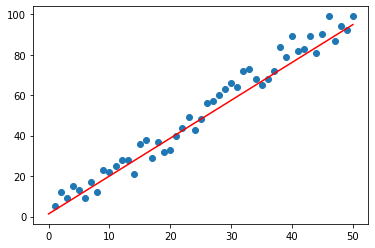

In [24]:
plt.scatter(x.numpy(), y.numpy())
plt.plot(s, predicted_y, 'r')